In [19]:
import math
import matplotlib.pyplot as plt

In [20]:
######## Q1

In [21]:
def minS(a, b, T, G):
    r = [(G[i] - a*T[i] - b)**2 for i in range(len(T))]
    return sum(r)

In [22]:
def annule_gradient(T, G):
    n = len(T) # n ?
    r = n * sum([T[i]*G[i] for i in range(len(T))])
    s = sum(T) * sum(G)
    t = n *sum([e**2 for e in T])
    u = sum(T)**2
    a = (r - s)/(t - u)
    b = sum(G)/n - a * sum(T)/n
    return a, b
    

In [23]:
def f(T, a, b):
    return [a*x + b for x in T]

In [24]:
def minJ(a, b, T, G):
    return  sum([(a*T[i] + b - G[i])**2 for i in range(len(T))])

In [25]:
def gradJ(a, b, T,G):
    n = len(T)
    Ja = sum([T[i] * (a*T[i] + b - G[i]) for i in range(n)]) / n
    Jb = sum([(a*T[i] + b - G[i]) for i in range(n)])/n
    return Ja, Jb


In [26]:
def gradient_descent(ai, bi, T, G, gamma, epsilon):
    a, b = ai, bi
    while True:
        Ja, Jb = gradJ(a, b, T, G)
        an = a - gamma * Ja
        bn = b - gamma * Jb
        if abs(minJ(an, bn, T, G) - minJ(a, b, T, G)) < epsilon:
            break
        a, b = an, bn
    return a, b


In [27]:
def RMSE(Y,Yesti):
    n = len(G)
    r = sum([(Yesti[i] - Y[i])**2 for i in range(n)])
    return math.sqrt(r/n)

In [28]:
def R2(Y, Yesti):
    n = len(Y)
    y_moy = sum(Y)/n
    r = sum([(Yesti[i] - y_moy)**2 for i in range(n)])
    s = sum([(Y[i] - y_moy)**2 for i in range(n)])
    return r/s

In [29]:
########### Q2

In [30]:
T = [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2]
G = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]
ai, bi = 0, 0
gamma =  0.005
gamma_compar =  0.0001
epsilon = 1*10**(-3)
epsilon_mc_RMSE = 34.805 # valeur du RMSE de moindre carré
epsilon_mo_RMSE = 34.808 # valeur du RMSE de methode d'optimisation
#epsilon_mo_RMSE_compar = 34.952 # valeur du RMSE de methode d'optimisation pour gamma different

In [31]:
### moindre carre (mc)
a_mc, b_mc = annule_gradient(T, G)
print(a_mc, b_mc)
y_mc = f(T, a_mc, b_mc)
yem_mc = f(T, a_mc, b_mc - epsilon_mc_RMSE)
yep_mc = f(T, a_mc, b_mc + epsilon_mc_RMSE)

30.08786179424521 -159.47415234086264


In [32]:
### methode d'optimisation (mo)
a_mo, b_mo = gradient_descent(ai, bi, T, G, gamma, epsilon)
print(a_mo, b_mo)
y_mo = f(T, a_mo, b_mo)
yem_mo = f(T, a_mo, b_mo - epsilon_mo_RMSE)
yep_mo = f(T, a_mo, b_mo + epsilon_mo_RMSE)

#a_mo_compar, b_mo_compar = gradient_descent(ai, bi, T, G, gamma_compar, epsilon)
#y_mo_compar = f(T, a_mo_compar, b_mo_compar)
#yem_mo_compar = f(T, a_mo_compar, b_mo_compar - epsilon_mo_RMSE_compar)
#yep_mo_compar = f(T, a_mo_compar, b_mo_compar + epsilon_mo_RMSE_compar)

29.97212162849485 -157.2215499895571


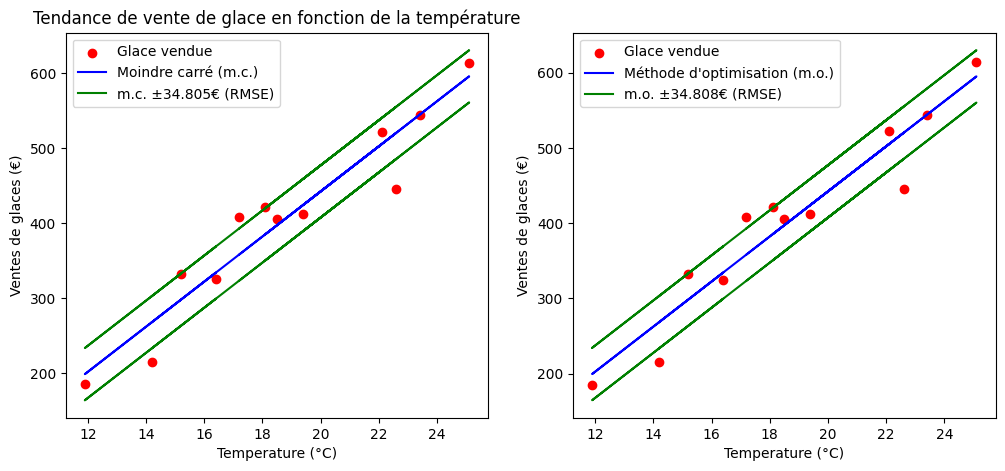

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(T, G, color='red', label='Glace vendue', marker='o')
ax1.plot(T, y_mc, label='Moindre carré (m.c.)', color='blue')
ax1.plot(T, yem_mc, label='m.c. ±' + str(epsilon_mc_RMSE) + "€ (RMSE)", color='green')
ax1.plot(T, yep_mc, color='green')
ax1.set_xlabel('Temperature (°C)')  
ax1.set_ylabel('Ventes de glaces (€)') 
ax1.set_title('Tendance de vente de glace en fonction de la température')
ax1.legend()

ax2.scatter(T, G, color='red', label='Glace vendue', marker='o')
ax2.plot(T, y_mo, label="Méthode d'optimisation (m.o.)", color='blue')
ax2.plot(T, yem_mo, label="m.o. ±" + str(epsilon_mo_RMSE) + "€ (RMSE)", color='green')
ax2.plot(T, yep_mo, color='green')
ax2.set_xlabel('Temperature (°C)') 
ax2.set_ylabel('Ventes de glaces (€)')  

#ax2.plot(T, y_mo_compar, label="Méthode d'optimisation (m.o.)", color='orange')
#ax2.plot(T, yem_mo_compar, label="m.o. ±" + str(epsilon_mo_RMSE_compar) + "€ (RMSE)", color='purple')
#ax2.plot(T, yep_mo_compar, color='purple')
ax2.legend()
plt.show()

In [34]:
######## Q3
rmsemc = RMSE(G,y_mc)
rmsemo = RMSE(G,y_mo)
rmc = R2(G, y_mc)
rmo= R2(G, y_mo)

print("La valeur RMSE par la methode des moindre carre: ", round(rmsemc, 3))
print("La valeur RMSE  par la methode d'optimisation: ", round(rmsemo, 3))

print("Le coefficient de determination de la methode des moindres carre vos: ", round(rmc, 3))
print("Le coefficient de determination de la methode d'optimisation vos: ", round(rmo, 3))

print("Qualité des predictions")
print("La methode des moindre carrées est une mieulleur approximation si l'on regarde avec la methode RMSE")
print("La methode d'optimisation est une mieulleur approximation si l'on regarde le coefficient de déterminsation")

#rmsemo_compar = RMSE(G,y_mo_compar)
#rmo_compar = R2(G, y_mo_compar)
#print("Comparaison méthode d'optimisation: ", round(rmsemo_compar, 3), ", ", round(rmo_compar, 3), " (rmse, coefficient de determination respectivement).")


La valeur RMSE par la methode des moindre carre:  34.805
La valeur RMSE  par la methode d'optimisation:  34.808
Le coefficient de determination de la methode des moindres carre vos:  0.917
Le coefficient de determination de la methode d'optimisation vos:  0.91
Qualité des predictions
La methode des moindre carrées est une mieulleur approximation si l'on regarde avec la methode RMSE
La methode d'optimisation est une mieulleur approximation si l'on regarde le coefficient de déterminsation


In [35]:
######## Q4
# vente de glace estime par moindre carre
temp13mc = f([13], a_mc, b_mc)[0]
temp20mc = f([20], a_mc, b_mc)[0]
temp27mc = f([27], a_mc, b_mc)[0]

print("la vente de glace estimer par la methode des moindre carre pour les temperature de 13°C, 20°C et 27°c sont: ", round(temp13mc, 3), "€, ", round(temp20mc, 3), "€ et ", round(temp27mc, 3), "€(respectivement).")

# vente de glace estime par methode d'optimisation
temp13mo = f([13], a_mo, b_mo)[0]
temp20mo = f([20], a_mo, b_mo)[0]
temp27mo = f([27], a_mo, b_mo)[0]
print("la vente de glace estimer par la methode d'optimisation pour les temperature de 13°C, 20°C et 27°c sont: ", round(temp13mo, 3), "€, ", round(temp20mo, 3), "€ et ", round(temp27mo, 3), "€(respectivement).")

la vente de glace estimer par la methode des moindre carre pour les temperature de 13°C, 20°C et 27°c sont:  231.668 €,  442.283 € et  652.898 €(respectivement).
la vente de glace estimer par la methode d'optimisation pour les temperature de 13°C, 20°C et 27°c sont:  232.416 €,  442.221 € et  652.026 €(respectivement).


In [36]:
######## Q5
T = [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2, 21]
G = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408, 450]

a_mc, b_mc = annule_gradient(T, G)
y_mc = f(T, a_mc, b_mc)
print(a_mc, b_mc)

a_mo, b_mo = gradient_descent(ai, bi, T, G, gamma, epsilon)
y_mo = f(T, a_mo, b_mo)
print(a_mo, b_mo)

print("Les ventes estime par la methode des moindres carrés sont:")
print(round(a_mc * 13 + b_mc, 3), "€ pour 13°C")
print(round(a_mc * 20 + b_mc, 3), "€ pour 20°C")
print(round(a_mc * 27 + b_mc, 3), "€ pour 27°C")

print("Les ventes estime par la methode d'optimisation sont:")
print(round(a_mo * 13 + b_mo, 3), "€ pour 13°C")
print(round(a_mo * 20 + b_mo, 3),  "€ pour 20°C")
print(round(a_mo * 27 + b_mo, 3), "€ pour 27°C")


29.824022251906534 -156.220604149407
29.70573601946872 -153.90287024211105
Les ventes estime par la methode des moindres carrés sont:
231.492 € pour 13°C
440.26 € pour 20°C
649.028 € pour 27°C
Les ventes estime par la methode d'optimisation sont:
232.272 € pour 13°C
440.212 € pour 20°C
648.152 € pour 27°C
